<a href="https://colab.research.google.com/github/andrewrudnell/Data-analytic/blob/main/MGIDI_contoh_dan_master_Rv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MGIDI: toward an effective multivariate selection in biological experiments**

### **Study Case: Data from Dr. Haris Maulana**

**Publisher: Dr. Haris Maulana, Andrew Yoel Siallagan, S.P.**

***VERSION***

- RV0: 31 Jan '24
>
- RV1: 17 FEB '24

# **Abstract**

---

This project leverages the **Multi-trait Genotype–Ideotype Distance Index (MGIDI)** to extract valuable insights from our dataset. The data originated from Dr. Haris Maulana's local file **"DATA_MGIDI_V2_XLSX.xlsx"**. All analyses were executed successfully, and the resulting findings will be elaborated and explained in a forthcoming publication manuscript that will be published.


**Link for Supplementary/Supporting Information Files:**

- MGIDI Supporting Information: https://www.researchgate.net/profile/Tiago-Olivoto/publication/343193508_Supplementary_Material_for_MGIDI_towards_an_effective_multivariate_selection_in_biological_experiments/data/5f5a2c8d92851c078958c158/supporting-mgidi.pdf?origin=publication_detail&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uRG93bmxvYWQiLCJwcmV2aW91c1BhZ2UiOiJwdWJsaWNhdGlvbiJ9fQ
- MGIDI Paper: https://doi.org/10.1093/bioinformatics/btaa981
- METAN Packages in Github: https://github.com/TiagoOlivoto/metan
- Metan Packages Reference Manual/ CRAN: https://cran.r-project.org/web/packages/metan/index.html

**Step 1: Install Packages**

In [ ]:
 install.packages('tidyverse')
 install.packages('metan')
 install.packages('future.apply')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘ggstats’, ‘plyr’, ‘Rcpp’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘minqa’, ‘nloptr’, ‘numDeriv’, ‘GGally’, ‘ggforce’, ‘ggrepel’, ‘lme4’, ‘lmerTest’, ‘mathjaxr’, ‘patchwork’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’




**Step 2: Install packages for import excel files**

In [ ]:
install.packages("openxlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Step 3: open packages**

In [ ]:
 library(tidyverse)
 library(metan)
 library(future.apply)
 library(openxlsx)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

|=========================================================|

| Multi-Environment Trial Analysis (metan) v1.18.0        |

| Author: Tiago Olivoto                                   |

| Type 'citation('metan')' to know how to cite metan      |

| Type 'vignette('metan_start')' for a short tutorial     |

| Visit 'https://bit.ly/pkgmetan' for a complete tutorial |

|============================

**Step 4: Open data**

In [ ]:
data <- read.xlsx("DATA_MGIDI_V2_XLSX.xlsx")%>%
 as_factor(GEN, BLOCK) # two first columns as factor

**Step 5: Exploratory Data Analysis (EDA)**

In [ ]:
str(data)

'data.frame':	132 obs. of  16 variables:
 $ GEN  : Factor w/ 44 levels "G1","G10","G11",..: 1 1 1 12 12 12 23 23 23 34 ...
 $ BLOCK: Factor w/ 3 levels "1","2","3": 1 2 3 1 2 3 1 2 3 1 ...
 $ FLO  : num  67 67 67 66 67 67 69 69 69 67 ...
 $ PH   : num  88.3 93.5 88.6 87 84.7 79.1 80.5 86.6 88.1 90.2 ...
 $ SH   : num  80.3 84.1 81.6 80.7 78.1 70.7 74.2 78.8 80.8 82.9 ...
 $ FLH  : num  65.6 68.7 65.5 67.5 63.1 59.9 59.8 61.7 65.7 64.1 ...
 $ DIS  : num  4 4 3 5 5 4 5 5 5 2 ...
 $ GY   : num  4223 3867 3676 4800 4626 ...
 $ HW   : num  77.4 77.1 76 80.8 77.6 ...
 $ NSS  : num  12.6 15.8 15.3 15.2 13.8 15.1 13.2 14.3 13.7 15.5 ...
 $ NGSP : num  3.13 2.52 2.73 2.49 2.51 2.7 2.6 2.38 2.27 2 ...
 $ SL   : num  8 9.4 7 6.3 6.6 8.4 6.3 7.8 7.3 7.3 ...
 $ SW   : num  1.96 2.02 1.68 1.86 1.57 1.9 1.64 1.78 1.39 1.42 ...
 $ NGS  : num  39.3 39.7 41.7 37.9 34.4 40.7 34.3 33.9 31.8 31.2 ...
 $ GMS  : num  1.45 1.5 1.27 1.49 1.28 1.45 1.3 1.33 1.16 1.07 ...
 $ HIS  : num  73.8 74.3 75.6 80.2 81.4 

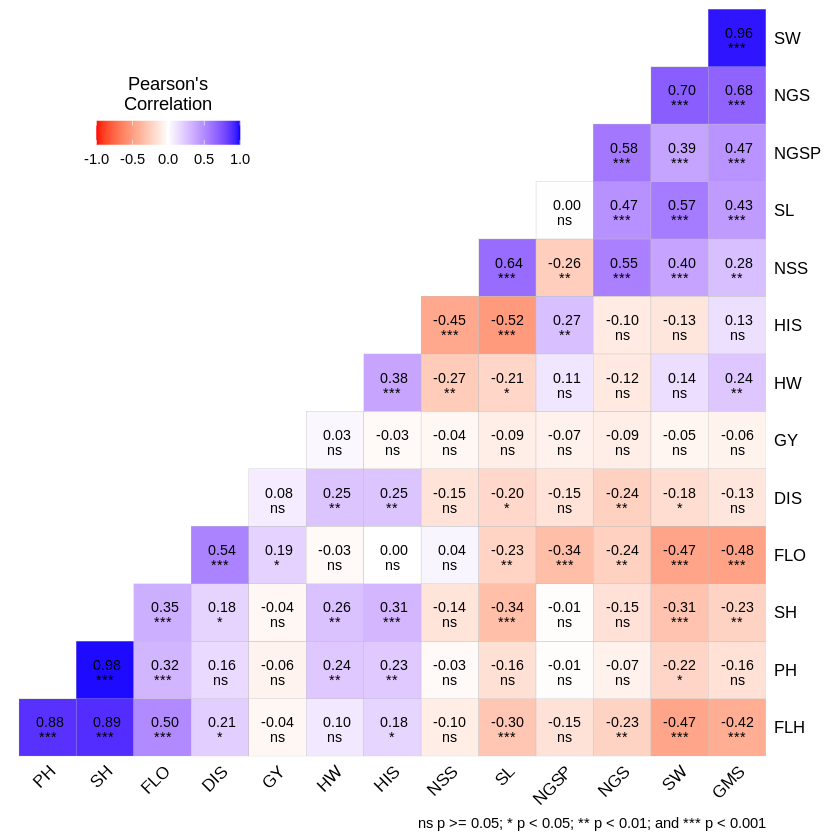

In [ ]:
## pearson correlation
corr_coef(data) %>%plot()

**Step 6: Modelling Data**

In [ ]:
 #Mixed-effectmodelforallvariablesinthedataset
 mod <-gamem(data,
 gen =GEN,
 rep =BLOCK,
 resp =everything())

Evaluating trait HIS |===========================================| 100% 00:00:02 


Method: REML/BLUP

Random effects: GEN

Fixed effects: REP

Denominador DF: Satterthwaite's method



---------------------------------------------------------------------------
P-values for Likelihood Ratio Test of the analyzed traits
---------------------------------------------------------------------------
    model      FLO       PH       SH      FLH      DIS       GY       HW
 Complete       NA       NA       NA       NA       NA       NA       NA
 Genotype 5.31e-23 1.66e-09 1.47e-11 6.21e-12 1.36e-18 5.71e-07 2.19e-10
      NSS    NGSP       SL      SW      NGS      GMS      HIS
       NA      NA       NA      NA       NA       NA       NA
 1.15e-08 0.00465 1.45e-05 1.3e-12 2.89e-05 5.24e-11 1.08e-09
---------------------------------------------------------------------------
All variables with significant (p < 0.05) genotype effect


In [ ]:
blups <- gmd(mod, "blupg")

Class of the model: gamem

Variable extracted: blupg



In [ ]:
blups

GEN,FLO,PH,SH,FLH,DIS,GY,HW,NSS,NGSP,SL,SW,NGS,GMS,HIS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G1,66.49800,89.33867,81.25200,65.52624,3.580989,4050.320,76.73875,14.79407,2.708809,8.296698,1.932851,40.31619,1.446468,74.61103
G10,62.18924,80.74343,71.73349,55.85919,3.879738,4313.505,74.58467,16.73271,2.442340,8.719790,2.281161,39.42105,1.641258,72.11973
G11,62.18924,85.47212,76.21922,59.08154,4.178486,4935.396,76.47450,16.96229,2.437182,9.098346,2.439991,39.70488,1.717010,70.87802
G12,57.57271,84.81898,75.34396,58.11759,3.282241,4525.604,77.86251,16.27356,2.560962,9.254222,2.671269,41.08033,2.044365,76.94220
G13,57.57271,94.19799,86.83181,66.38002,3.580989,4375.508,77.68367,13.74822,2.782733,7.895874,1.726651,34.81437,1.351779,77.91089
G14,56.34164,88.50266,80.56820,59.71499,2.385997,4043.727,77.69168,14.15635,2.586749,8.140822,2.378688,37.21596,1.865807,78.61707
G15,63.11255,88.37203,79.58352,60.12811,3.282241,4551.750,75.84189,16.65619,2.607379,8.831130,2.345250,43.00160,1.749475,74.90768
G16,57.57271,83.43434,74.93368,57.15364,2.087249,4537.071,75.73778,15.58483,2.638324,8.408038,2.309026,41.05850,1.698072,73.66859
G17,60.65040,84.00910,73.94901,58.69596,3.282241,4101.288,75.80985,17.19187,2.657235,9.699582,2.453923,45.20670,1.706188,70.10096


In [ ]:
blups %>% select(HIS) # original values

HIS
<dbl>
74.61103
72.11973
70.87802
76.94220
77.91089
78.61707
74.90768
73.66859
70.10096


In [ ]:
mgidi_index <- mgidi(mod,
 ideotype = c(rep("l", 4), rep("h", 10)),
 SI = 15)


-------------------------------------------------------------------------------
Principal Component Analysis
-------------------------------------------------------------------------------
# A tibble: 14 × 4
   PC    Eigenvalues `Variance (%)` `Cum. variance (%)`
   <chr>       <dbl>          <dbl>               <dbl>
 1 PC1          5.57          39.8                 39.8
 2 PC2          2.41          17.2                 57.0
 3 PC3          1.82          13.0                 70.0
 4 PC4          1.38           9.83                79.8
 5 PC5          1.01           7.19                87.0
 6 PC6          0.7            5                   92.0
 7 PC7          0.44           3.12                95.1
 8 PC8          0.32           2.31                97.4
 9 PC9          0.16           1.16                98.6
10 PC10         0.11           0.77                99.4
11 PC11         0.07           0.49                99.9
12 PC12         0.02           0.13               100  
13 PC13

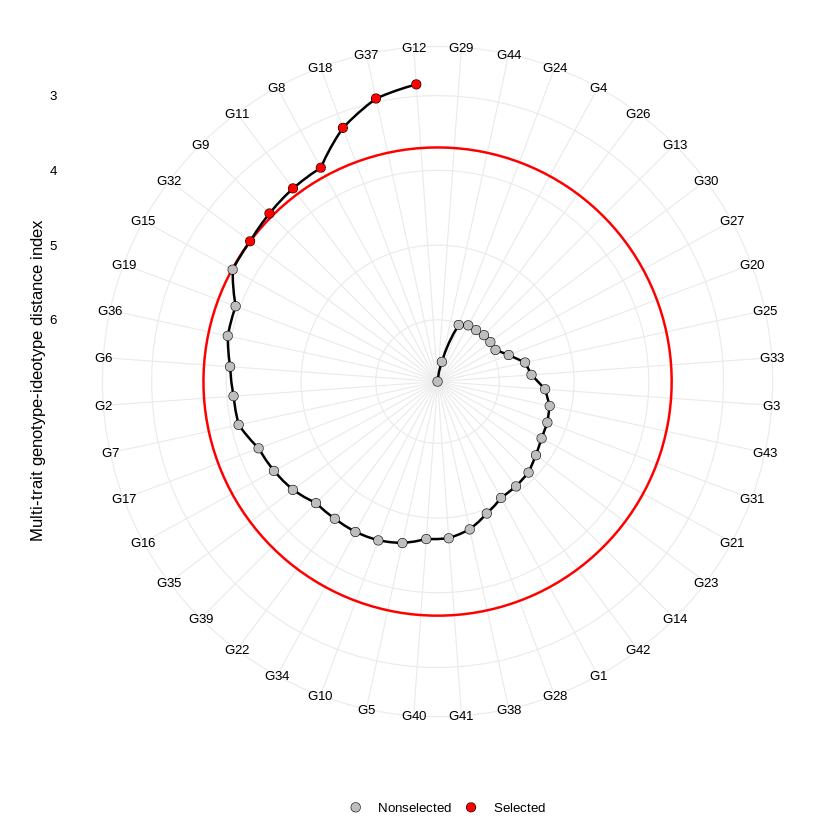

In [ ]:
9#MGIDI index
 plot(mgidi_index)

In [ ]:
data_edit <- read.xlsx("MGIDI.xlsx")

In [ ]:
str(data_edit)

'data.frame':	10 obs. of  11 variables:
 $ VARIETAS: chr  "T1" "T2" "T3" "T4" ...
 $ Yield   : num  512 356 483 449 303 ...
 $ NUE     : num  25.53 64.1 11.72 10.56 4.29 ...
 $ INHIBISI: num  83.9 80.3 51.6 76.8 81.4 ...
 $ AA      : num  0.229 0.22 0.146 0.211 0.223 ...
 $ DA      : num  4 3.9 3.73 3.77 3.57 ...
 $ LC      : num  3.5 3.93 4.4 3.77 3.7 ...
 $ TASTE   : num  40 40.3 41.7 39.7 40 ...
 $ AROMA   : num  4 4.13 4 4.03 4.03 ...
 $ IL      : num  4.17 4.27 4.27 4.23 4.13 ...
 $ TV      : num  78.8 80.6 82.6 78.8 78.1 ...


In [ ]:
data_ns_mat<-column_to_rownames(data_edit,"VARIETAS")

In [ ]:
#Definetheideotypevector
 ide_vect<-c("l","l", rep("h", 8))
 ide_vect

[1] "l" "l" "h" "h" "h" "h" "h" "h" "h" "h"

In [ ]:
 #Fitthemgidiindex
 mgidi_data_ns<-mgidi(data_ns_mat,ideotype= ide_vect)


-------------------------------------------------------------------------------
Principal Component Analysis
-------------------------------------------------------------------------------
# A tibble: 10 × 4
   PC    Eigenvalues `Variance (%)` `Cum. variance (%)`
   <chr>       <dbl>          <dbl>               <dbl>
 1 PC1          4.25          42.5                 42.5
 2 PC2          2.35          23.5                 66.0
 3 PC3          1.68          16.8                 82.8
 4 PC4          1.01          10.1                 92.9
 5 PC5          0.43           4.3                 97.2
 6 PC6          0.21           2.1                 99.3
 7 PC7          0.07           0.65                99.9
 8 PC8          0.01           0.07               100  
 9 PC9          0              0                  100  
10 PC10         0              0                  100  
-------------------------------------------------------------------------------
Factor Analysis - factorial loadings af

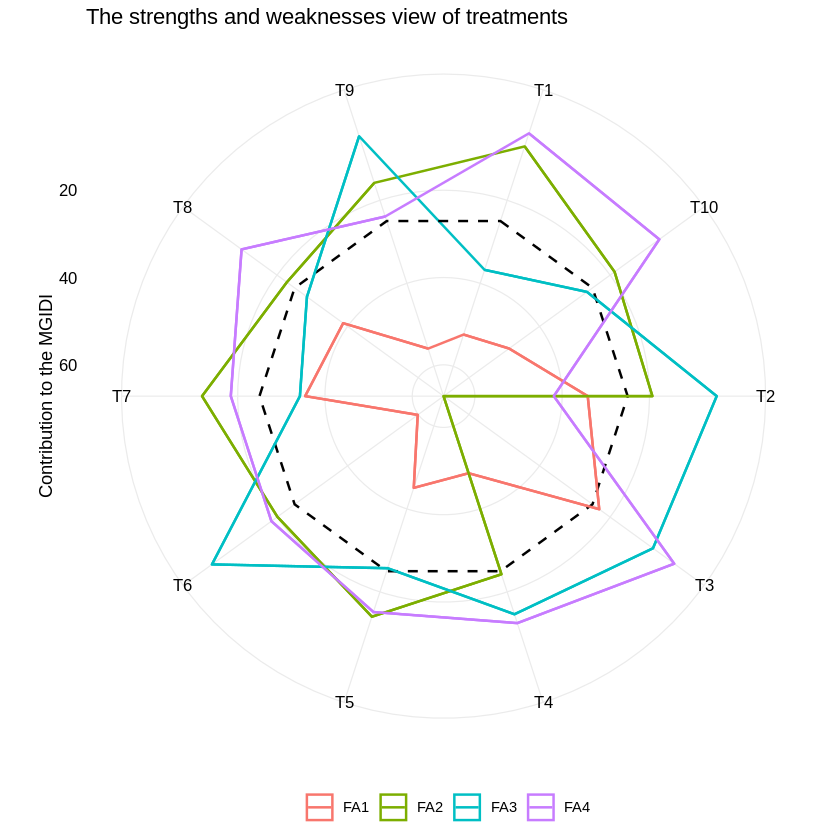

In [ ]:
 plot(mgidi_data_ns,
 type = "contribution",
 genotypes = "all",
 x.lab = "Treatments",
 width = 1,
 title = "The strengths and weaknesses view of treatments",
 rotate = TRUE)